In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train=pd.read_excel("Data_Train.xlsx")

In [6]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
test=pd.read_excel("Test_set.xlsx")

In [9]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [10]:
train['source']='train'

In [11]:
test['source']='test'

In [13]:
df=pd.concat([train,test],axis=0,sort=False,ignore_index=True)

In [51]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Date_of_Journey_new
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,2019-03-24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,2019-01-05
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train,2019-09-06
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2019-12-05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2019-01-03


In [16]:
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
count,13354,13354,13354,13354,13353,13354,13354,13354,13353,13354,10683.000000,13354
unique,12,44,5,6,132,223,1451,374,5,10,NaN,2
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN,train
freq,4746,633,5682,5682,3000,288,536,672,7056,10493,NaN,10683
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000,NaN


In [17]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
source                0
dtype: int64

In [33]:
approved_term = train[train['Total_Stops']=='Y']['Loan_Amount_Term'].value_counts()
unapproved_term = data_train[data_train['Loan_Status']=='N']['Loan_Amount_Term'].value_counts()
df = pd.DataFrame([approved_term,unapproved_term])
df.index = ['Approved','Unapproved']
df.plot(kind='bar', stacked=True, figsize=(15,8))

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376.0,train
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231.0,train
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392.0,train
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368.0,train
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303.0,train
1685,Jet Airways,9/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 10 May,13h 30m,2 stops,No info,15129.0,train
1704,IndiGo,09/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,6860.0,train
1807,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,06:45,04:25 02 Jun,21h 40m,2 stops,In-flight meal not included,10919.0,train
1891,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,In-flight meal not included,10368.0,train
1971,Jet Airways,9/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,04:25 11 May,29h 20m,2 stops,No info,15129.0,train


In [26]:
df.shape

(13354, 12)

In [30]:
df[df['Total_Stops']=='nan.np']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source


AttributeError: Unknown property figsize

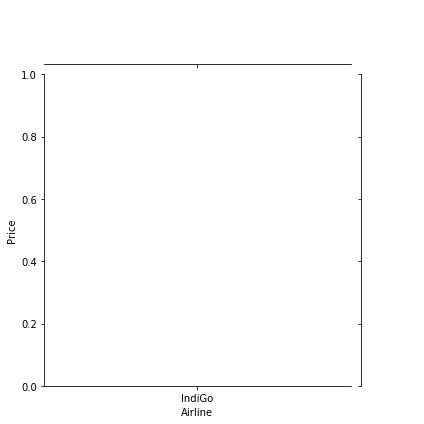

In [34]:
sns.jointplot(x=df['Airline'], y=df['Price'], data=df, kind='scatter',annot_kws=10)

C:\Users\VINOTH S\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


ValueError: String "Price" must be one of: "on", "off", "true", or "false"

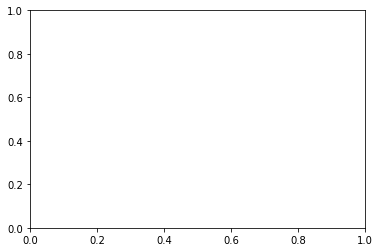

In [28]:
plt.box('Price')

In [35]:
import pandas_profiling as pp

C:\Users\VINOTH S\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\VINOTH S\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\VINOTH S\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\VINOTH S\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\VINOTH S\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\VINOTH S\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  

In [78]:
pp.ProfileReport(df)

Number of variables,18
Number of observations,13354
Total Missing (%),1.1%
Total size in memory,1.8 MiB
Average record size in memory,140.0 B
Numeric,4
Categorical,11
Boolean,1
Date,1
Text (Unique),0
Rejected,1


In [37]:
df.Airline.value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [38]:
df.Price.max()

79512.0

In [41]:
df.query('Price'=79512.0)

SyntaxError: keyword can't be an expression (<ipython-input-41-aa61872ab7cf>, line 1)

In [42]:
df[df['Price']==79512.0]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512.0,train


In [43]:
df[df['Additional_Info']=='Business class']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512.0,train
3032,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BDQ → DEL,05:50,12:20,6h 30m,1 stop,Business class,28097.0,train
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427.0,train
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209.0,train
12485,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,13:15,7h 30m,1 stop,Business class,NaN,test


In [44]:
df.Airline.value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [50]:
df['Date_of_Journey_new'] = pd.to_datetime(df.Date_of_Journey)

In [57]:
df['Journey_quarter'] = df['Date_of_Journey_new'].dt.quarter

In [73]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Date_of_Journey_new,Journey_quarter,Date_journey_day,Date_Journey_dayofweek,Date_Journey_dayweek,Date_Journey_is_weekend
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,2019-03-24,1,24,6,Sunday,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,2019-01-05,1,5,5,Saturday,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train,2019-09-06,3,6,4,Friday,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2019-12-05,4,5,3,Thursday,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2019-01-03,1,3,3,Thursday,0


In [61]:
df['Date_journey_day'] = df['Date_of_Journey_new'].dt.day

df[['Date_of_Journey_new', 'Date_journey_day']].head()

,Date_of_Journey_new,Date_journey_day
0,2019-03-24,24
1,2019-01-05,5
2,2019-09-06,6
3,2019-12-05,5
4,2019-01-03,3


In [63]:
df['Date_Journey_dayofweek'] = df['Date_of_Journey_new'].dt.dayofweek

df[['Date_of_Journey_new', 'Date_Journey_dayofweek']].head()

,Date_of_Journey_new,Date_Journey_dayofweek
0,2019-03-24,6
1,2019-01-05,5
2,2019-09-06,4
3,2019-12-05,3
4,2019-01-03,3


In [64]:
# day of the week - name

df['Date_Journey_dayweek'] = df['Date_of_Journey_new'].dt.weekday_name

df[['Date_of_Journey_new', 'Date_Journey_dayweek']].head()

,Date_of_Journey_new,Date_Journey_dayweek
0,2019-03-24,Sunday
1,2019-01-05,Saturday
2,2019-09-06,Friday
3,2019-12-05,Thursday
4,2019-01-03,Thursday


In [66]:

# was the application done on the weekend?

df['Date_Journey_is_weekend'] = np.where(df['Date_Journey_dayweek'].isin(['Sunday', 'Saturday']), 1,0)
df[['Date_of_Journey_new', 'Date_Journey_dayweek','Date_Journey_is_weekend']].head()

,Date_of_Journey_new,Date_Journey_dayweek,Date_Journey_is_weekend
0,2019-03-24,Sunday,1
1,2019-01-05,Saturday,1
2,2019-09-06,Friday,0
3,2019-12-05,Thursday,0
4,2019-01-03,Thursday,0


In [75]:
df['Date_Journey_year'] = df['Date_of_Journey_new'].dt.year

df[['Date_of_Journey_new', 'Date_Journey_year']].head()

,Date_of_Journey_new,Date_Journey_year
0,2019-03-24,2019
1,2019-01-05,2019
2,2019-09-06,2019
3,2019-12-05,2019
4,2019-01-03,2019


In [77]:
df.Date_Journey_year.value_counts()

2019    13354
Name: Date_Journey_year, dtype: int64

In [72]:
df.drop(columns=["Date_Journey_year"],inplace=True)

In [79]:
df.Total_Stops.value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [80]:
df[df['Total_Stops']=='non-stop']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Date_of_Journey_new,Journey_quarter,Date_journey_day,Date_Journey_dayofweek,Date_Journey_dayweek,Date_Journey_is_weekend,Date_Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,2019-03-24,1,24,6,Sunday,1,2019
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,train,2019-06-24,2,24,0,Monday,0,2019
11,IndiGo,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174.0,train,2019-04-18,2,18,3,Thursday,0,2019
12,Air India,Chennai,Kolkata,MAA → CCU,11:40,13:55,2h 15m,non-stop,No info,4667.0,train,2019-06-24,2,24,0,Monday,0,2019
14,IndiGo,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804.0,train,2019-04-24,2,24,2,Wednesday,0,2019
22,IndiGo,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943.0,train,2019-03-04,1,4,0,Monday,0,2019
23,IndiGo,Banglore,Delhi,BLR → DEL,18:55,21:50,2h 55m,non-stop,No info,4823.0,train,2019-01-05,1,5,5,Saturday,1,2019
28,Vistara,Banglore,Delhi,BLR → DEL,09:45,12:35,2h 50m,non-stop,No info,4668.0,train,2019-06-18,2,18,1,Tuesday,0,2019
29,Vistara,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3687.0,train,2019-06-15,2,15,5,Saturday,1,2019
30,Vistara,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3687.0,train,2019-06-18,2,18,1,Tuesday,0,2019
